# MAT281 - Tarea 2

**Indicaciones**:

* En los **Ejercicio 1-8** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente o cómodo, en ambos casos cada gráfico debe tener elementos mínimos como:
    - Título
    - Nombre de los ejes, leyendas, etc. en formato _amigable_/_humano_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `casos_confirmados` se espera que el eje del gráfico tenga por nombre `Casos confirmados`.
    - Colores adecuados al tipo de datos.
    - Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.
    - Cada vez que no se cumplan alguna de estos requerimientos se descontará __1 punto__ de la nota final.

* Para el **Ejercicio 9** es obligación utilizar `altair`.
* Cada ejercicio debe estar acompañado con una celda con comentarios o análisis que puedas desprender de los gráficos.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets

from datetime import date
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
alt.data_transformers.enable('data_server')
alt.themes.enable('opaque')

%matplotlib inline

**COVID-19 en Chile** 

En esta tarea exploraremos los datos de Covid-19 en Chile a profundidad. Las siguientes celdas cargarán los datos a utilizar en tu sesión. Es importante que leas la documentación de cada conjunto de datos para comprender las columnas.

In [38]:
start_date = pd.to_datetime("2020-04-13")

In [39]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto6
confirmados = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto6/bulk/data.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
    .dropna()
    .astype({"casos_confirmados": np.float, "tasa": np.float})
)

confirmados.head()

,poblacion,casos_confirmados,fecha,region_id,region,provincia_id,provincia,comuna_id,comuna,tasa
0,247552.0,270.0,2020-04-27,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,109.067994
1,247552.0,9138.0,2020-10-12,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,3691.345657
2,247552.0,596.0,2020-05-29,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,240.757497
3,247552.0,6131.0,2020-08-17,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2476.651370
4,247552.0,353.0,2020-05-11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,142.596303


In [40]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto19
activos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto19/CasosActivosPorComuna.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .loc[lambda x: x["codigo_comuna"].notnull()]
    .melt(id_vars=["region", "codigo_region", "comuna", "codigo_comuna", "poblacion"], var_name="fecha", value_name="casos_activos")
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
)

activos.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,fecha,casos_activos
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-04-13,88.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-04-13,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-04-13,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-04-13,0.0
4,Tarapaca,1,Alto Hospicio,1107.0,129999.0,2020-04-13,8.0


In [41]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto14
fallecidos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["region"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos.head()

,region,fecha,fallecidos
374,Arica y Parinacota,2020-04-13,1.0
375,Tarapacá,2020-04-13,0.0
376,Antofagasta,2020-04-13,1.0
377,Atacama,2020-04-13,0.0
378,Coquimbo,2020-04-13,0.0


In [42]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto10
fallecidos_etareo = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["grupo_de_edad"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
        grupo_de_edad=lambda x: x["grupo_de_edad"].str.replace("<=39", "0-39")
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos_etareo.head()

,grupo_de_edad,fecha,fallecidos
28,0-39,2020-04-13,3
29,40-49,2020-04-13,2
30,50-59,2020-04-13,3
31,60-69,2020-04-13,12
32,70-79,2020-04-13,29


## Ejercicio 1

(10 puntos)

Mostrar cantidad de fallecidos la fecha por cada grupo etáreo.

In [43]:
alt.Chart(fallecidos_etareo.iloc[-7:,:]).mark_bar().encode(
    x = alt.X('grupo_de_edad:O', title =  'Grupo etáreo'),
    y = alt.Y('fallecidos:Q', title = 'Fallecidos'),
).properties(
    width=600,
    height=400,
    title = 'Fallecidos a la fecha por cada grupo etáreo'
)


alt.Chart(...)

**Comentarios:** A la fecha el rango etario con mas fallecidos es 70-79, mientras que el rango etario con menos fallecidos es 0-39

## Ejercicio 2

(10 puntos)

¿Qué tan variable es la población de las comunas de Chile? Considera utilizar un gráfico que resuma de buena forma la información sin agregar la variable de región o provincia.

In [44]:
alt.Chart(activos).mark_bar().encode(
    x = alt.X('comuna', title = 'Comuna', sort= '-y'),
    y = alt.Y('poblacion', title = 'Población'),
).properties(title = 'Población por comuna'
)

alt.Chart(...)

**Comentarios:** A simple vista podemos notar que la mayoria de las comunas tienen menos de 100.000 habitantes, por otro lado existen una cantidad considerable de comunas entre los 200.000 y los 300.000 habitantes. Pocas comunas superan los 300.000 habitantes, pero las que lo hacen llegan a mas de 400.000, 500.000 y 600.000 habitantes. En conclucion existe una gran variabilidad en la poblacion de las comunas

## Ejercicio 3

(10 puntos)

Mostrar evolución y comparación de los fallecimientos entre distintos grupos etáreos, pero que al mismo tiempo sea fácil identificar la cantidad de fallecidos total en cada fecha.

In [45]:
alt.Chart(fallecidos_etareo).mark_line().encode(
    x=alt.X('fecha',title = 'Fecha'),
    y=alt.Y('fallecidos',title = 'Numero de fallecidos'),
    color='grupo_de_edad'
).properties(title = 'Numero de fallecidos acumulados por fecha y por grupo etario'
)

alt.Chart(...)

**Comentarios:** Notemos que desde un principio el grupo etario con mas fallecidos acumulados ha sido el rango 70-79, mientras que el grupo etario con menos fallecidos acumulados siempre ha sido 0-39. Podemos notar que en julio la velocidad de fallecimiento aumento y luego disminuyo en agosto.

## Ejercicio 4

(10 puntos)

Mostrar en tres gráficos la evolución de casos confirmados, evolución de fallecimientos y evolución de casos activos.

In [46]:
confirm=alt.Chart(confirmados).mark_line().encode(
    x=alt.X('fecha',title="Fecha"),
    y=alt.Y('sum(casos_confirmados)',title="Total de Casos confirmados")
).properties(title = 'Total de casos confirmados por fecha'
)

fallec= alt.Chart(fallecidos_etareo).mark_line().encode(
    x=alt.X('fecha',title="Fecha"),
    y=alt.Y('sum(fallecidos)',title="Total de Fallecidos")
).properties(title = 'Total de Fallecidos por fecha'
)

activ= alt.Chart(activos).mark_line().encode(
    x=alt.X('fecha',title="Fecha"),
    y=alt.Y('sum(casos_activos)',title="Total de Casos Activos")
).properties(title = 'Total de casos activos por fecha'
)
confirm & fallec & activ 

alt.VConcatChart(...)

**Comentarios:** Notemos que entre junio y julio hubo un aumento de casos activos diarios, y se vio reflejado en un aumento en la pendiente de la cantidad de contagiados y un aumento en la pendiente de la cantidad de fallecidos 

## Ejercicio 5

(10 puntos)

Comparar la tasa de incidencia entre las regiones a lo largo del tiempo.

In [47]:
tasa_reg = (confirmados[["region","fecha","poblacion","casos_confirmados"]]
       .groupby(["region","fecha"]).agg('sum').reset_index()
)
tasa_reg=tasa_reg.assign(tasa=100000*tasa_reg["casos_confirmados"]/tasa_reg["poblacion"])
tasa_reg

,region,fecha,poblacion,casos_confirmados,tasa
0,Antofagasta,2020-04-13,691854.0,149.0,21.536336
1,Antofagasta,2020-04-15,691854.0,176.0,25.438893
2,Antofagasta,2020-04-17,691854.0,211.0,30.497764
3,Antofagasta,2020-04-20,691854.0,264.0,38.158340
4,Antofagasta,2020-04-24,691854.0,368.0,53.190413
...,...,...,...,...,...
1051,Ñuble,2020-11-13,511551.0,10562.0,2064.701271
1052,Ñuble,2020-11-16,511551.0,10761.0,2103.602573
1053,Ñuble,2020-11-20,511551.0,11022.0,2154.623879
1054,Ñuble,2020-11-23,511551.0,11240.0,2197.239376


In [48]:
alt.Chart(tasa_reg).mark_line().encode(
    x=alt.X('fecha',title="Fecha"),
    y=alt.Y('tasa',title="Tasa de incidencia"),
    color=alt.Color('region',title="Región"),
    tooltip = [alt.Tooltip('region', title = 'Region')]
).properties(
    width=600,
    height=400,
    title = 'Tasa de incidencia por región'
)


alt.Chart(...)

**Comentarios:** Notamos que la tasa de reincidencia en un principio fue mas alta en la region de Magallanes. Desde mediados de mayo la region metropolitana tuvo la tasa de reincidencia mas alta hasta mediados de Septiembre, luego la region de Magallanes volvio a tener la tasa de incidencia mas alta (hasta la actualidad). Por otro lado notamos que Arica y Parinacota ha estado desde Junio subiendo poco a poco su tasa de incidencia. Actualmente es la segunda region con tasa de incidencia mas alta. 

## Ejercicio 6

(10 puntos)

¿Hay alguna conclusión que puedas obtener rápidamente al graficar un _scatter plot_ con los casos confirmados y tasa de incidencia de cada comuna para los días 13 de abril y 6 de noviembre del 2020? Además, colorea cada punto según la región a la que pertenece y considera si es útil en el gráfico que el tamaño sea proporcional a la población.

In [49]:
fecha_1=pd.to_datetime("2020-04-13")
fecha_2 = pd.to_datetime("2020-11-06")

alt.Chart(confirmados.loc[lambda x: (x["fecha"]==fecha_1) | (x["fecha"]==fecha_2)]).mark_circle().encode(
    x = alt.X('casos_confirmados', title = 'Casos confirmados'),
    y = alt.Y('tasa', title = 'Tasa'),
    color = alt.Color('region', title = 'Región'),
    size=alt.Size("poblacion"),
    tooltip = [alt.Tooltip('fecha', title = 'Fecha')]
).properties(
    width=600,
    height=400,
    title = 'Tasa vs Casos confirmados '
)

alt.Chart(...)

**Comentarios:** Notamos que para el 13 de abril los datos de todas las regiones parecen tener el mismo comportamiento (pocos casos confirmados, tasa de incidencia baja). Pero para el 6 de noviembre los datos regionales están dispersados y los comportamientos son muy variables (pocos casos confirmados y alta tasa, pocos casos confirmados y baja tasa, muchos casos confirmados y una tasa media o alta). El tamaño es util, pues no es lo mismo una tasa alta en una comuna de 100.000 habitantes a una tasa alta en una comuna de 600.000 habitantes

## Ejercicio 7

(10 puntos)

1. Grafica la evolución de los casos activos de cada comuna en un solo gráfico. 
2. Grafica la evolución de los casos activos de cada comuna en gráficos separados por región.

Entrega los pros y contras de cada uno de estos enfoques.

In [50]:
alt.Chart(activos).mark_line().encode(
    x=alt.X('fecha',title="Fecha"),
    y=alt.Y('casos_activos',title="Casos Activos"),
    color=alt.Color('comuna',title="Comuna")
).properties(
    width=600,
    height=400,
    title = 'Evolución de casos activos por comuna'
)

alt.Chart(...)

In [51]:
graficoscomuna=[]
for x in activos["region"].unique(): 
    graficoscomuna.append(alt.Chart(activos.loc[lambda df: df["region"]==x]).mark_line().encode(
    x=alt.X('fecha',title="Fecha"),
    y=alt.Y('casos_activos',title="Casos Activos"),
    color=alt.Color('comuna',title="Comuna")
    ).properties(
    width=600,
    height=400,
    title = f'Evolucion de casos activos en {x}'
))

alt.vconcat(*graficoscomuna).resolve_scale(color='independent')



alt.VConcatChart(...)

**Comentarios:** 

Primer grafico: 
Contras: 

        - No se alcanza a ver todas las comunas en la legenda del grafico. 
        
        - Al ser tantas comunas no se puede visualizar de manera correcta.
        
Pros: 
    
        - De manera general se ven regiones con un comportamiento similar y se alcanzan a notar los comportamientos atipicos
       
Segundo grafico:
Pros:  
        
        -Se visualizan los nombres de todas las comunas de la region
        -Al ser menos lineas podemos notar el comportamiento claramente en la mayoria de las regiones
        
Contras:

        - Para regiones con muchas comunas volvemos al mismo problema anterior, no es posible la visualizacion clara de las lineas

## Ejercicio 8

(10 puntos)

Hacer un gráfico que permita comparar rápidamente entre regiones su promedio de casos activos , máximo de casos confirmados y fallecidos. Utiliza los valores reales y apoyarlos con colores.

Se adjunta el diccionario `region_names` con tal de reemplazar los nombres de las regiones en los datos `fallecidos` para poder unir con los otros datos. 

In [52]:
region_names = {
    "Araucanía": "La Araucanía",
    "Aysén": "Aysén del General Carlos Ibáñez del Campo",
    "Magallanes": "Magallanes y de la Antártica Chilena",
    "Metropolitana": "Metropolitana de Santiago",
    "O’Higgins": "Libertador General Bernardo O'Higgins",
}

In [53]:
fallecidos_reg=fallecidos.groupby("region").agg(num_fallecidos=('fallecidos','max')).drop("Total",axis=0)
fallecidos_reg=fallecidos_reg.rename(region_names)
activos_reg=activos.groupby("codigo_region").agg(prom_activos = ('casos_activos','mean'))
confirmados_reg=confirmados.groupby("region").agg(max_confirmados=('casos_confirmados',"max"),codigo_region=("region_id","mean"))
aux=pd.merge(fallecidos_reg,confirmados_reg.reset_index(), how="right",on="region")
resumen_reg=pd.merge(activos_reg,aux, how="right",on="codigo_region").drop("codigo_region",axis=1)
resumen_reg

,prom_activos,region,num_fallecidos,max_confirmados
0,78.112795,Antofagasta,562.0,12831.0
1,100.310606,Arica y Parinacota,207.0,10530.0
2,33.713805,Atacama,106.0,4820.0
3,4.406061,Aysén del General Carlos Ibáñez del Campo,14.0,1086.0
4,46.290174,Biobío,610.0,6401.0
5,33.002020,Coquimbo,270.0,5099.0
6,16.421402,La Araucanía,229.0,5836.0
7,24.648760,Libertador General Bernardo O'Higgins,544.0,9046.0
8,24.295455,Los Lagos,203.0,7812.0
9,17.915404,Los Ríos,55.0,2940.0


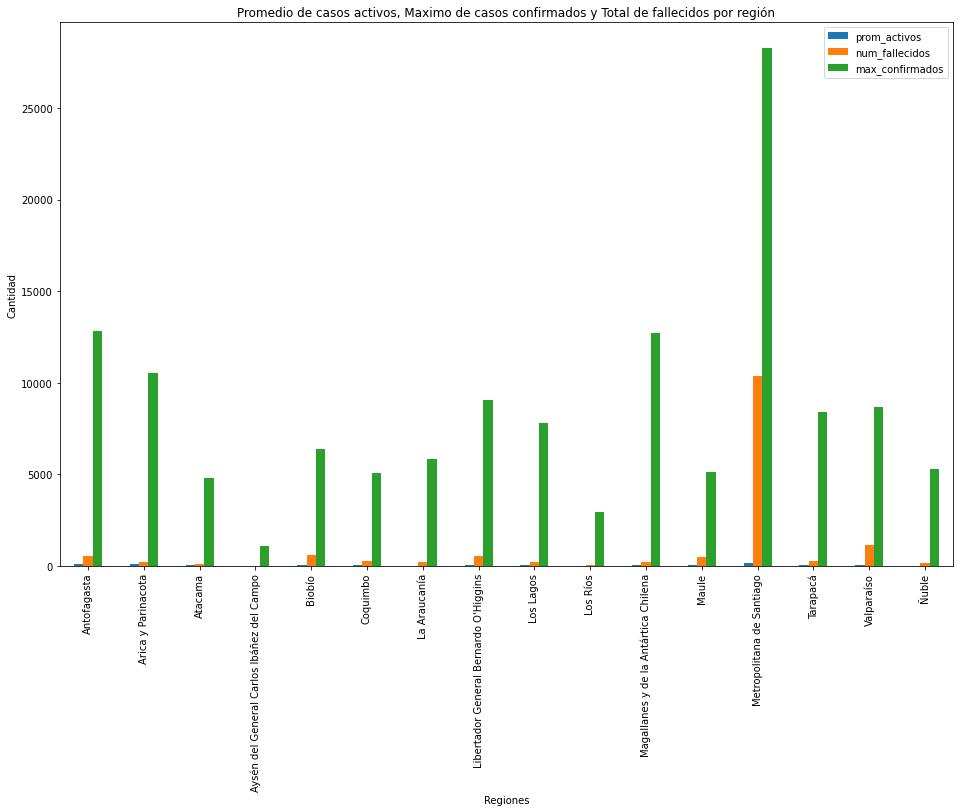

In [61]:
display(resumen_reg.plot(x="region",kind='bar',
                 title="Promedio de casos activos, Maximo de casos confirmados y Total de fallecidos por región",
                figsize=(16,10),xlabel="Regiones",ylabel="Cantidad"))

**Comentarios:** Claramente la región Metropolitana ha sido la mas afectada, no solo tiene la cantidad de contagiados mas alta, sino que tambien tiene la cantidad mas alta de fallecidos. Para todas las regiones la cantidad de activos es muy baja (la escala del grafico ni siquiera permite ver la cantidad, por lo que recomendaria graficar en otro grafico) 

## Ejercicio 9


En este ejercicio buscaremos realizar un mini-dashboard respecto al estado de los casos de COVID-19 en Chile, por lo tanto utilizaremos haremos uso de datos geográficos de manera operacional (es decir, no nos preocuparemos de proyecciones en mapas ni nada por el estilo), lo único es que debes instalar `geopandas` en tu ambiente virtual y no olvidar actualizarlo en tu `environment.yml` para luego subirlo a tu repositorio de GitHub.

Con tu ambiente activo (`conda activate mat281`) basta con ejecutar `conda install -c conda-forge geopandas` para instalar `geopandas`.

In [22]:
import geopandas as gpd
from pathlib import Path

In [23]:
shp_filepath = Path().resolve().parent / "data" / "regiones_chile.shp"
regiones = gpd.read_file(shp_filepath)
regiones.head()

,Region,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,geometry
0,Región Metropolitana de Santiago,1092,7,13,15392.030737,2.225204e+10,1.064253e+06,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
1,Región de Antofagasta,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
2,Región de Arica y Parinacota,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
3,Región de Atacama,1089,4,3,75661.248635,9.643906e+10,2.401741e+06,"MULTIPOLYGON (((-7900342.628 -3153340.296, -79..."
4,Región de Aysén del Gral.Ibañez del Campo,1088,14,11,106703.377369,2.242743e+11,4.144481e+07,"MULTIPOLYGON (((-8208500.834 -5733817.475, -82..."


In [24]:
type(regiones)

geopandas.geodataframe.GeoDataFrame

Lo único que tienes que saber es que un `GeoDataFrame` es idéntico a un `DataFrame` salvo que debe poseer una columna llamada `geometry` caracterice los elementros geométricos, que en este casos son polígonos con los límites de las regiones de Chile. 

Para graficar mapas en Altair se debe usar `mark_geoshape`, además, para no preocuparnos de las proyecciones si o si debes declarar lo siguiente que se muestra en la siguiente celda en las propiedades del gráfico. El resto es igual a cualquier otro gráfico de Altair.

In [25]:
alt.Chart(regiones).mark_geoshape().encode(
).properties(
    projection={'type': 'identity', 'reflectY': True},
    width=250,
    height=600
)

alt.Chart(...)

### Ejercicio 9.1

(10 puntos)

Define el `DataFrame` con el nombre `casos_geo` tal que tenga las columnas

* `region`
* `codigo_region`
* `fecha`
* `poblacion`
* `casos_confirmados`
* `tasa`
* `casos_activos`
* `fallecidos`
* `geometry`

Ten mucho cuidado como unes los dataframes `confirmados`, `activos`, `fallecidos` y `regiones`. Idealmente utilizar el código de región, pero en caso que no se encuentren disponibles utilizar el nombre de la región (no olivdar utilizar el diccionario `region_names`).

In [26]:
confirmados=confirmados.rename(columns={'region_id': 'codigo_region'})
confirmados["codigo_region"]=confirmados["codigo_region"].astype('int')
regiones=regiones.rename(columns={'codregion': 'codigo_region'})

In [27]:
casos_geo = ( confirmados[["region","codigo_region","fecha","poblacion","casos_confirmados","tasa"]]
             .merge(activos[["codigo_region","fecha","casos_activos"]], how='inner',on=['fecha','codigo_region'])
             .merge(fallecidos, how='inner', on=['region',"fecha"]) 
             .merge(regiones[['codigo_region','geometry']], how='inner', on=["codigo_region"])
)

Ejecuta lo siguiente para convertir el DataFrame anterior en un GeoDataFrames

In [28]:
casos_geo = casos_geo.pipe(lambda x: gpd.GeoDataFrame(x, geometry="geometry"))

### Ejercicio 9.2

(5 puntos)

Modifica la función `covid_chile_chart` tal que reciba una fecha y una columna. Luego, debe filtrar `casos_geo` con registros de la fecha seleccionada y graficar un mapa donde las regiones se colereen según la columna escogida. 

In [29]:
def covid_chile_chart(fecha, col):
    
    fecha = pd.to_datetime(fecha)
    data = casos_geo.loc[lambda df: df["fecha"]==fecha][:10]
    
    chart = alt.Chart(data).mark_geoshape().encode(
        color=col  
    ).properties(
        projection={'type': 'identity', 'reflectY': True},
        width=150,
        height=400
    )
    
    chart.display()
    return

Prueba con lo siguiente

In [30]:
fecha = "2020-04-13"
col = "tasa"
covid_chile_chart(fecha, col)

alt.Chart(...)

### Ejercicio 9.3

(5 puntos)

Ahora utilizando `widgets` generaremos el dashboard interactivo. Define lo siguiente:

* col_widget: Un `widgets.Dropdown` donde las opciones a seleccionar sean las columnas `poblacion`, `casos_confirmados`, `tasa`, `casos_activos` y `fallecidos`. Además, el argumento `description` debe ser `Columna`.
* fecha_widget: Un `widgets.DatePicker` donde el argumento `description` sea `Fecha`.
* Ambos widgets deben tener el argumento `continuous_update=False`

In [31]:
import ipywidgets as widgets
from ipywidgets import interactive, interact

In [32]:
col_widget = widgets.Dropdown(
    options=['poblacion','casos_confirmados','tasa','casos_activos','fallecidos'],
    description='Columna',
    continuous_update = False
)

In [33]:
fecha_widget = widgets.DatePicker(
    description='Fecha',
    continuous_update = False
)

Finalmente, haciendo uso de `interactive`, la función `covid_chile_chart` y todos los widgets es posible crear un _dashboard_ interactivo con los datos de Covid-19.

Respira profundo y explora tu creación!

In [34]:
covid_dashboard = interactive(
    covid_chile_chart,
    fecha=fecha_widget,
    col=col_widget
)
covid_dashboard

interactive(children=(DatePicker(value=None, description='Fecha'), Dropdown(description='Columna', options=('p…

**Comentarios:**  Se ve interesante pero pide muchos recursos